# Statistics : MDI220 2022/2023
# Project : nuclear power accidents 2016
### IQBI Hamza

In [1]:
import pandas as pd
import numpy as np
from os import path
from scipy import stats
import matplotlib.pyplot as plt

### Exercise 1.1 :

In [2]:
path.join('/Users/IQBI Hamza/OneDrive/Bureau/2A/MDI220/', 'project/')
df = pd.read_csv('C_id_35_NuclearPowerAccidents2016.csv', sep=',', usecols=['Date', 'Location', 'Cost (millions 2013US$)'],
                                                                                                        low_memory=True)
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True) #Convert to date type in order to compare
df_bis = df[df['Date'] < '3/28/1979'] #The three mile accident occured on March 28, 1979
df_clean = df_bis.dropna() #Remove all missing values
n = len(df_clean)
print("The number of nuclear accidents before the Three Mile Island is :", n)
df_clean.head()

The number of nuclear accidents before the Three Mile Island is : 55


,Date,Location,Cost (millions 2013US$)
4,1957-09-11,"Rocky Flats, USA",8189.0
5,1955-03-25,"Sellafield, UK",4400.0
6,1977-01-01,"Beloyarsk, USSR",3500.0
7,1955-07-14,"Sellafield, UK",2900.0
8,1969-10-12,"Sellafield, UK",2500.0


### Exercise 1.2 :




$\text{Let}$ $X \sim \mathcal{N}(\mu, \sigma^2)$, $\text{with}$ $\theta = (\mu, \sigma^2)$

$\text{Let's show that :}$ 
$$(\forall p \in (0, 1)), F_\theta^{-1}(p) = \sigma F_{(0, 1)}^{-1}(p) + \mu$$

$\text{We have}$ $F_\theta(x) = \frac{1}{2}[1+erf(\frac{x-\mu}{\sqrt{2}\sigma}]$ ; where $(\forall z \in \mathbb{R})$, $erf(z) = \frac{2}{\sqrt{\pi}} \int_{0}^{z} \exp({-t^2})dt$

$F_\theta$ $\text{is continuous and strictly increasing, therefore its quantile function is equal to the inverse of}$ $F_\theta.$

$\text{Let}$ $x \in \mathbb{R}$ $\text{and}$ $p \in (0, 1)$ :

\begin{align} 
        F_\theta^{-1}(p) = x &\Leftrightarrow p = F_\theta(x)\\
                             &\Leftrightarrow p = \frac{1}{2}[1+erf(\frac{x-\mu}{\sqrt{2}\sigma}]\\
                             &\Leftrightarrow x = \sqrt{2}\sigma erf^{-1}(2p-1) + \mu \\
\end{align}

$\text{Hence :}$
$$\forall p \in (0, 1), F_\theta^{-1}(p) = \sqrt{2}\sigma erf^{-1}(2p-1) + \mu$$

$\text{In particular, since we consider}$
$\mu$ and $\sigma$ $\text{to be arbitrary parameters of this gaussian random variable, we may take}$ $\mu = 0$ $\text{and}$ $\sigma = 1$

$\text{We get that for all}$
$p$ in $(0, 1)$,  $F_{(0, 1)}^{-1}(p) = \sqrt{2}erf^{-1}(2p-1)$

$\text{Finally, we have}$
$$(\forall p \in (0, 1)), F_\theta^{-1}(p) = \sigma F_{(0, 1)}^{-1}(p) + \mu$$


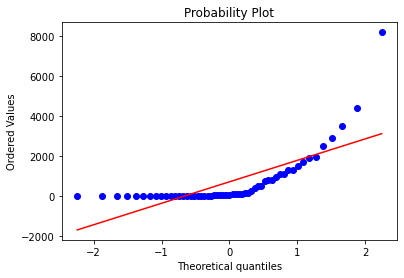

In [3]:
#The Q-Q plot of data for the gaussian model
X = stats.probplot(df_clean['Cost (millions 2013US$)'], dist='norm', fit=True, plot=plt)

### Exercise 1.3 :

$\text{Let}$ $F_\theta$ $\text{be the cumulative distribution function of an exponential distribution with parameter}$ $\theta > 0.$

$\text{We have that}$ $(\forall x \in \mathbb{R}), F_\theta(x) = 1 - \exp{(-\theta x)}$

$F_\theta$ $\text{is continuous and strictly increasing, therefore its quantile function is equal to the inverse of}$ $F_\theta.$

$\text{Let}$ $(x \in \mathbb{R}), (p \in [0, 1[)$

\begin{align}
       F_\theta^{-1}(p) = x &\Leftrightarrow p = F_\theta(x) \\
                            &\Leftrightarrow x = \frac{1}{\theta} (-\ln(1-p)) \\
\end{align}

$\text{In particular, for}$ $\theta = 1$ $\text{, we get that for all p in [0, 1[ :}$ $F_\theta^{-1}(p) = -\ln(1-p)$

$\text{Finally, we have : }$ 

$$(\forall p \in [0, 1[), F_\theta^{-1}(p) = \frac{1}{\theta} F_1^{-1}(p)$$

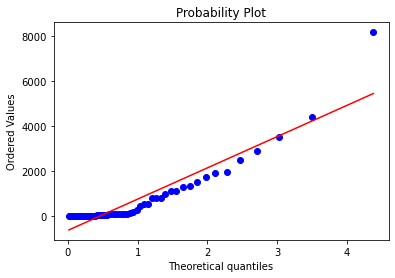

In [4]:
#The Q-Q plot of data for an exponential model
X = stats.probplot(df_clean['Cost (millions 2013US$)'], dist='expon', fit=True, plot=plt)

### Exercise 1.4 :


### Exercise 2.1 :


$\text{Let's compute the maximum likelihood estimator}$ $\hat{\theta}$ $\text{of}$ $\theta$.

$\text{We have that :}$ 
$[\hat{\theta}(x) = argmax_{\theta \in \mathbb{R+}} (p_{\theta}(x)) = argmax_{\theta \in \mathbb{R+}} \log(p_{\theta}(x))]$, $\text{for all}$ $x \in \mathbb{R}^n$

$\text{Where}$ $p_{\theta}$ $\text{is the density of}$ $\mathcal{P}_{\theta}$ $\text{with respect to the Lebesgue measure.}$

$\text{We have that :}$
$$ (\forall (x_1, \dots, x_n) \in \mathbb{R}^n), p_{\theta}(x_1,\dots, x_n) = \prod_{k=1}^{n}(\theta \exp{(-\theta x_k) \mathbb{1}_{\mathbb{R+}}(x_k))}$$

$\text{Let}$ $x = (x_1, \dots, x_n) \in \mathbb{R+}^n$, $\text{we have that :}$
\begin{align}
       \log(p_{\theta}(x)) &= \log(\theta^n \prod_{k=1}^{n} \exp(-\theta x_k)) \\
                           &= n \log(\theta) - (\sum_{k=1}^{n} x_k) \theta \\
\end{align}

$\text{for x fixed in}$ $\mathbb{R}^n$, $\text{by taking the derivative, we have}$ : 

\begin{align}
       \frac{\partial \log(p_{\theta}(x))}{\partial \theta} = 0 &\Leftrightarrow \frac{n}{\theta} - \sum_{k=1}^{n} x_k = 0 \\
                                                &\Leftrightarrow \theta = \frac{n}{\sum_{k=1}^{n}x_k} \\
\end{align}

$\text{Therefore, we can deduce that : }$

$$(\forall x = (x_1, \dots, x_k) \in \mathbb{R}^n), \quad \hat{\theta}(x) = 
\begin{cases}
       \frac{n}{\sum_{k=1}^{n}x_k} & if \quad x_1, \dots, x_n \in \mathbb{R+} \\
       0 & otherwise
\end{cases}$$

### Exercise 2.2 :


Text(0, 0.5, 'density')

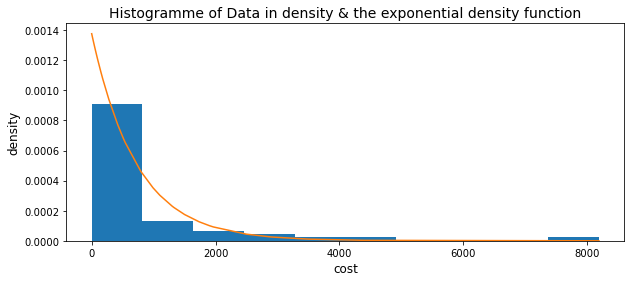

In [5]:
df_clean = df_clean.rename(columns = {'Cost (millions 2013US$)' : 'Cost'})
cost = df_clean['Cost'].to_numpy()
MLestimator = n/sum(cost)

fig = plt.figure(figsize = (10, 4))  
ax = fig.add_subplot(111)
plt.title("Histogramme of Data in density & the exponential density function", fontsize=14)
plt.hist(cost, density = True) 
plt.plot(cost, stats.expon.pdf(cost, scale = 1/MLestimator)) # scale : the expectation is given as an input to 'expon.pdf()'
plt.xlabel("cost", fontsize=12)
plt.ylabel("density", fontsize=12)

### Exercise 2.3 :


$\text{The quadratic risk of the estimator}$ $\hat{g}$ $\text{is given by}$ : 
$$R(\theta, \hat{g}) = \mathbb{E}[(\hat{g}(X) - g(\theta))^2]$$ 
$\text{Then :}$

\begin{align}
       R(\theta, \hat{g}) &= \mathbb{E}[(\frac{1}{n} \sum_{k=1}^{n} X_k - \frac{1}{\theta})^2] \\
                          &= \frac{1}{n^2} \mathbb{E}(\sum_{k=1}^{n} (X_k - \frac{1}{\theta})^2] \\
                          &= \frac{1}{n^2}\sum_{k=1}^{n}\mathbb{E}[X_k^2] - \frac{2}{n^2 \theta}\sum_{k=1}^{n}\mathbb{E}[X_k] + \frac{1}{n \theta^2} \\       
                          &= \frac{1}{n^2}\sum_{k=1}^{n} \frac{2}{\theta^2} - \frac{2}{n^2 \theta}\sum_{k=1}^{n}\frac{1}{\theta} + \frac{1}{n \theta^2} \\
       R(\theta, \hat{g}) &= \frac{1}{n \theta^2} \\
\end{align}

$\text{On the other hand, we have for one observation}$ $X_1$ $\text{the Fisher information is given by :}$

$$I_1(\theta) = -\mathbb{E}[\frac{\partial^2 log(p_{\theta})}{\partial \theta^2}(X_1)] = \frac{1}{\theta^2}$$
$\text{Therefore, we have that}$ $I_n({\theta}) = n I_1({\theta}) = \frac{n}{\theta^2}.$

$\text{We know that the quadratic risk of the estimator satisfies the Cramér-Rao baound :}$ $R(\theta, \hat{g}) \ge \frac{g'(\theta)^2}{I_n(\theta)}.$

$\text{But, }$ 
$g'(\theta) = \frac{-1}{\theta^2} \Rightarrow \frac{g'(\theta)^2}{I_n(\theta)} = \frac{1}{n \theta^2}.$

$\text{Hence, the Cramér-Rao baound is reached, and the estimator}$ $\hat{g}$ $\text{is efficient}.$

### Exercise 2.4 :

In [6]:
def g_hat(x):
    return sum(x)/len(x)

cost = df_clean['Cost'].to_numpy()
g_hat = g_hat(cost)
print("The value of the estimator g_hat is :", g_hat)

The value of the estimator g_hat is : 726.3363636363636


### Exercise 2.5

$\text{Let}$ $\eta > 0$, $\text{we define the estimator}$ $g_{\eta} = \eta g$.

$\text{The estimator}$ $\hat{g_{\eta}}$ $\text{is biased :}$
$$(bias(\theta, \hat{g_{\eta}})) =  \mathbb{E}[\hat{g_{\eta}}(X) - \frac{1}{\theta}] = \frac{\eta - 1}{\theta}$$

$\text{We have that}$ 

\begin{align}
       R(\theta, \hat{g_{\eta}}) &= \mathbb{E}[(\hat{g_{\eta}}(X) - g(\theta)^2] + (bias(\theta, \hat{g_{\eta}}))^2 \\
                           &= \mathbb{E}[(\eta (\hat{g}(X) - g(\theta)))^2] + (\frac{\eta - 1}{\theta})^2 \\
                           &= \eta^2 \mathbb{E}[(\hat{g}(X) - g(\theta))^2] + (\frac{\eta - 1}{\theta})^2 \\
                           &= \eta^2 R(\theta, \hat{g}) + (\frac{\eta - 1}{\theta})^2 \\
\end{align}

$\text{In order to have}$ $R(\theta, \hat{g_{\eta}}) < R(\theta, \hat{g})$, $\text{we must, first of all, choose }$ $\eta < 1$.

$\text{Then, }$

\begin{align}
        R(\theta, \hat{g_{\eta}}) < R(\theta, \hat{g}) & \Leftrightarrow \frac{\eta^2}{n \theta^2} + (\frac{\eta - 1}{\theta})^2 < \frac{1}{n \theta^2} \\
                                                       & \Leftrightarrow \eta^2 + n (1-\eta)^2 < 1 \\
                                                       & \Leftrightarrow n (1-\eta)^2 < (1-\eta)(1+\eta) \\
                                                       & \Leftrightarrow \eta > \frac{n-1}{n+1} \\
\end{align}

$\text{We get that}$ $R(\theta, \hat{g_{\eta}}) < R(\theta, \hat{g}) \Leftrightarrow \eta \in ]\frac{n-1}{n+1}, 1[.$

$\text{With the choice of }$ $\theta \ in ]\frac{n-1}{n+1}, 1[$, $\text{we get that }$ $\hat{g_{\eta}}$ $\text{is "very close" to }$ $\hat{g}$.

$\text{This might be due to the fact that}$ $\hat{g}$ $\text{is an efficient estimator of }$ $g(\theta)$, $\text{so trying to obtain another estimator }$ $\hat{g_{\eta}} \space s.t \space g_{\eta} = \eta g$ $\text{(even if biased) might be difficult}.$ 

### Exercise 2.6 :

$\text{The median}$ $\mathcal{M}$ $\text{of an exponential law of parameter}$ $\theta$ $\text{is  given by :}$ $\mathcal{M}_{\theta} = \frac{\log(2)}{\theta}$.

$\text{We have that : }$ $\mathbb{E}[\hat{g_{\eta}(X)}] = \eta \mathbb{E}[\hat{g}(X)] = \frac{\eta}{\theta}.$

$\text{For}$ $\hat{g_{\eta}}$ $\text{to be an unbiased estimator for the median cost, we must have }$ $\mathcal{M}_{\theta} = \frac{\eta}{\theta}.$

$\text{Therefore, we must take }$ $\eta = \log(2).$

In [7]:
n, s = len(cost), sum(cost)
eta = np.log(2)
g_eta = eta*s/n
print("The estimator g_eta_hat is :", g_eta)

cost_sorted = np.sort(cost)
M = cost_sorted[n//2]
print("The empirical median is :", M)

The estimator g_eta_hat is : 503.45800259270857
The empirical median is : 89.9


$\text{The value of the unbiased estimator}$ $\hat{g_{\eta}}$ $\text{is very considerably larger than the empirical median}.$

### Exercise 2.7 :

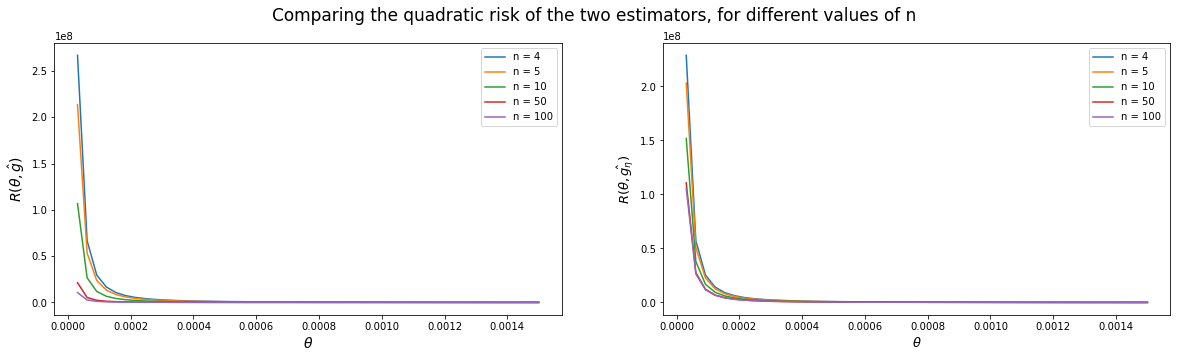

In [8]:
N_samples = [4, 5, 10, 50, 100]
Theta = np.linspace(0, 0.0015) #The two risks are equal to zero for every theta greater than 0.0015

for k in N_samples :
    theta = k/s
    np.seterr(divide = 'ignore') #To ignore the division by zero in the values of theta
    R_g = 1/(k*(Theta**2))
    R_g_eta = (eta**2)*R_g + ((eta-1)/Theta)**2
    
    plt.subplot(1, 2, 1)
    plt.plot(Theta, R_g, label="n = {}".format(k))
    plt.gcf().set_size_inches(20, 5)
    plt.legend()
    plt.xlabel("$\\theta$", fontsize=14)
    plt.ylabel("$R(\\theta, \hat{g})$", fontsize=14)
    
    plt.subplot(1, 2, 2)
    plt.plot(Theta, R_g_eta, label="n = {}".format(k))
    plt.legend()
    plt.xlabel("$\\theta$", fontsize=13)
    plt.ylabel("$R(\\theta, \hat{g_{\eta}})$", fontsize=13)
    
    plt.suptitle("Comparing the quadratic risk of the two estimators, for different values of n", fontsize=17)

$\text{In order to find that } R(\theta, \hat{g_{\eta}}) < R(\theta, \hat{g}), \space \text{we need to have } \space \eta > \frac{n-1}{n+1} \Leftrightarrow n < \frac{1 + \eta}{1 - \eta}.$

$\text{With the chosen value of } \eta = \log(2), \frac{1 + \eta}{1 - \eta} \approx 5,52.$

$\rightsquigarrow \text{Indeed, in the plots above, we can see that the condition } R(\theta, \hat{g_{\eta}}) < R(\theta, \hat{g}) \text{ holds only for } n = 5 \space \& \space n = 4 \space (\text{for the represented values of } n).$

### Exercise 3.1 :

$\text{The null hypothesis corresponds to an expected cost of at least one billion dollars. which means :} \\
\mathbb{E}_{\theta}[X] \ge 1000 \space (\forall \theta \in \Theta_0) \space \space \space \text{(since, in the dataframe, the cost is expressed in millions of dollars)}.$

$\text{But we know that } \mathbb{E}_{\theta}[X] = \frac{1}{\theta}.$

$\text{Hence, we denote}
\begin{cases}
      \Theta_0 = ]0, \theta_0] \space & where \space \theta_0 = \frac{1}{1000}\\
      \Theta_1 = ]\theta_0, \infty[ \\
\end{cases}$

$\text{So, the hypothesis are : }$
$$\underbrace{\left (H_0 : \left\{\theta \in \Theta_0 \right\} \right)}_{\text{The null hypothesis}} \space \space \text{against} \underbrace{\left (H_1 : \left\{\theta \in \Theta_1 \right\} \right)}_{\text{The alternative hypothesis}}.$$

### Exercise 3.2 :

$\text{The observation } (X_1, ..., X_n) \text{ is an i.i.d n-sample of an exponential family, of density } p(x; \theta). $

$\text{We have that } (\forall x \in \mathbb{R}^n) :$

\begin{align}
        p(x; \theta) & = \prod_{k=1}^{n}\theta \exp(-\theta x_k) \mathbb{1}_{[0, + \infty[}(x_k) \\
                     & = \prod_{k=1}^{n}\exp(\log(\theta)) \exp(-\theta x_k) \mathbb{1}_{[0, + \infty[}(x_k) \space \space \space (since \space \theta>0)\\
                     & = \prod_{k=1}^{n}\exp(-\theta x_k + log(\theta)) \mathbb{1}_{[0, + \infty[}(x_k) \\
                     & = \mathbb{1}_{\mathbb{R+}^n}(x) \exp(-\theta \sum_{k=1}^{n}x_k + n \log(\theta)) \\
        p(x; \theta) & = h(x) exp(\phi(\theta) T(x) - \psi(\theta)) \\
\end{align}

$\text{With } h = \mathbb{1}_{\mathbb{R+}^n}, \space \space\phi = -id \rightsquigarrow \phi \text{ is a decreasing function}.$

$\begin{array}{ccccc}
T & : & \mathbb{R}^n & \to & \mathbb{R} \\
 & & (x_1, ..., x_n) & \mapsto &  \sum_{k=1}^{n}x_k\\
\end{array} \text{is a scalar statistic}$

$\text{And } \psi : \theta \mapsto -n \log(\theta)$

$\text{Hence, the likelihood ratio is a decreasing function of T}$

$\text{The Neyman-Pearson’s approach states then that } \delta = \mathbb{1}_{T < c_{\alpha}} \text{ is a UPM test at level } \alpha, \text{ with } (\alpha, c_{\alpha}) \text{ are such that : } \mathbb{P}_{\theta_0}(T(X) < c_{\alpha}) = \alpha. $

$\text{Let } \alpha \in (0, 1) \text{ be fixed}.$
$\text{We have that } T(X) \sim \Gamma(n, \theta), \text{ since } X_1, ..., X_n \text{ are n i.i.d random variables following an exponential distribution of parameter } \theta.$

$\mathbb{P}_{\theta_0}(T(X) < c_{\alpha}) = \alpha \Leftrightarrow c_{\alpha} = F_{T(X)}^{-1}(\alpha), \space \text{where } F_{T(X)} \text{ is the CDF of the random variable } T(X) ;\space \text{and } F_{T(X)}^{-1} \text{ its quantile function}.$


### Exercise 3.3 :

In [9]:
alpha = 0.05
theta_0 = 1/1000

#--- Applying the test ---#
c_alpha = stats.gamma.ppf(alpha, n, scale = 1/theta_0) #The rate is theta_0 and is equal to 1/scale
print("The value of c_alpha is : ", c_alpha)
T = sum(cost)
print("The value of T is : ", T)
test = T < c_alpha
if test :
    print("We have that T < c_alpha, so we reject H0, and decide H1.")
else :
    print("We have that T > c_alpha, so we decide H0, and reject H1.")
    
    
#--- Computing the p-value ---#
p_value = stats.gamma.cdf(T, n, scale = 1/theta_0)
print("The p_value is : ", p_value)

The value of c_alpha is :  43395.81385987552
The value of T is :  39948.49999999999
We have that T < c_alpha, so we reject H0, and decide H1.
The p_value is :  0.013717486423264867


$\text{We have computer the } p-value \text{ of our statistical test as } \mathbb{P}_{\theta_0}(T(X) < \sum_{k=1}^{n} x_k), \space \text{where the } x_k \space \text{are the } n \text{ observations}.$

$\text{We know that the } p-value \text{ describes the likelihood to have found a particular set of observations if the null hypothesis were true}$

$\text{Hence, the smaller the } p-value, \text{ the more likely we are to reject the null hypothesis}.$

$\rightsquigarrow \text{ The value that we've got } (0.013717486423264867 \ll 1) \text{ confirms the result of the test, where } H_0 \text{ was rejected and } H_1 \text{accepted}.$

### Exercise 3.4 :

$\text{We have that } \hat{g}(X) = \frac{1}{n} \sum_{k=1}^{n} X_k = \frac{1}{n} T(X).$

$\text{Hence, } \hat{g}(X) \sim \Gamma(n, n \theta) \space \space (\text{of rate } n \theta).$

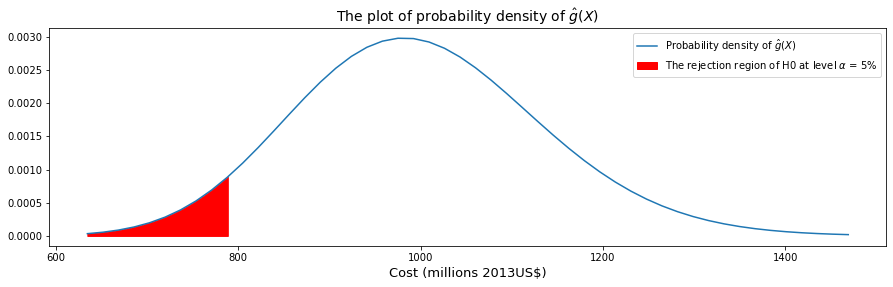

In [10]:
x1 = stats.gamma.ppf(0.001, n, scale = 1/(n*theta_0))
x2 = stats.gamma.ppf(0.999, n, scale = 1/(n*theta_0))
# x1 and x2 are in order to get "significant" regions of the cost
x = np.linspace(x1, x2)

g_density = stats.gamma.pdf(x, n, scale = 1/(n*theta_0))
fig = plt.figure(figsize = (15, 4))  
ax = fig.add_subplot(111)
plt.plot(x, g_density, label="Probability density of $\hat{g}(X)$")
c = stats.gamma.ppf(alpha, n, scale = 1/(n*theta_0))
to_fill_x = np.arange(x1, c)
to_fill_y = stats.gamma.pdf(to_fill_x, n, scale=1/(n*theta_0))
plt.fill_between(to_fill_x, to_fill_y, color = 'red', label = "The rejection region of H0 at level $\\alpha$ = 5%")
plt.title("The plot of probability density of $\hat{g}(X)$", fontsize=14)
plt.xlabel('Cost (millions 2013US$)', fontsize=13)
plt.legend()

### Exercise 3.5 :

$\text{We have that the power of the test at level } \alpha \text{ is : }$

$(\forall \theta \in \Theta_1), \space \beta(\theta, \delta) = \mathbb{P}_{\theta}[\delta(X)=1] = \mathbb{P}_{\theta}[T(X)<c_{\alpha}]$

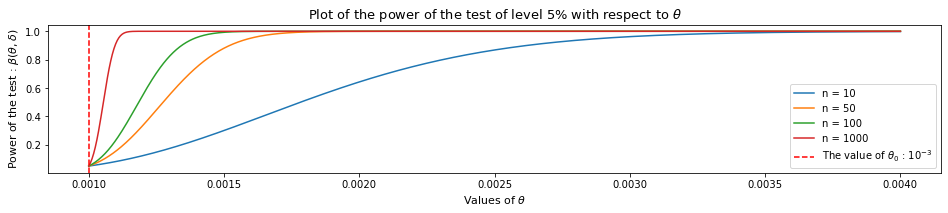

In [11]:
N_samples = [10, 50, 100, 1000]
Theta = np.linspace(theta_0, 0.004, 1000) 
#Since we want to calculate the power of test, we're insterested in theta greater than theta_0

fig = plt.figure(figsize = (16, 6))  
ax = fig.add_subplot(211)

for N in N_samples:
    c = stats.gamma.ppf(alpha, N, scale=1/theta_0)
    beta = stats.gamma.cdf(c, N, scale = 1/Theta)
    plt.plot(Theta, beta, label = "n = {}".format(N)) 

plt.axvline(theta_0, color='red', linestyle ='--', label='The value of $\\theta_0$ : $10^{-3}$')
plt.title("Plot of the power of the test of level 5% with respect to $\\theta$", fontsize=13)
plt.xlabel('Values of $\\theta$', fontsize=11)
plt.ylabel('Power of the test : $\\beta(\\theta, \\delta)$', fontsize=11)
plt.legend()

### Exercise 3.6 :

$\text{The Central Limit Theorem affirms that } (\frac{\hat{g}(X_n) - \mu}{\frac{\sigma}{\sqrt{n}}})_n \text{ converges in law to } \mathcal{N}(0, 1) \text{ as } n \to \infty. \\ \text{ Where we have assumed } \begin{cases}
    (X_k)_{k \in \mathbb{N}} \text{ are i.i.d random variables} \\ \mu = \mathbb{E}[X_0] \\ \sigma^2 = Var[X_0]
\end{cases}$

$\text{Hence, we can approximate } \hat{g}(X_n) \text{ as a random variable following the districution } \mathcal{N}(\mu, \frac{\sigma^2}{n}), \text{ for large enough values of n}.$

$\text{In the case we're treating, we have that } \mu = \frac{1}{\theta} \text{ and } \sigma^2 = \frac{1}{\theta^2}. \text{ Thus, we're going to use a random variable of distribution } \mathcal{N}(\frac{1}{\theta}, \frac{1}{n\theta^2}).$

In [12]:
central_lim_c = stats.norm.ppf(alpha, loc = 1/theta_0, scale = 1/(np.sqrt(n)*theta_0))
g_hat = sum(cost)/n

print("The value of central_lim_c is : ", central_lim_c)

test_bis = g_hat < central_lim_c
if test_bis :
    print("We have that g_hat < central_lim_c, so we reject H0, and decide H1.")
else :
    print("We have that g_hat > central_lim_c, so we decide H0, and reject H1.")
    
p_value_bis = stats.norm.cdf(g_hat, loc = 1/theta_0, scale = 1/(np.sqrt(n)*theta_0))
print("The new p_value is : ", p_value_bis)
print("We have found that the new p-value is less than 5%, so it reinforces our decision of rejecting H0.")

The value of central_lim_c is :  778.2079821874304
We have that g_hat < central_lim_c, so we reject H0, and decide H1.
The new p_value is :  0.021201463906399102
We have found that the new p-value is less than 5%, so it reinforces our decision of rejecting H0.


$\textbf{General Conclusion :} \text{ By all the tests that we've conducted, it turns out that the null hypothesis is to be rejected.}$ 

$\text{Thus, the expected cost of an accident is less than one billion dollars.}$